In [1]:
import sys
sys.executable

'/usr/bin/python3'

In [2]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
# import config

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [65]:
dataset_name = 'UrbanSound'
num_classes=10
Sound_database =  '/content/drive/My Drive/Datasets_new/'
DATASET_PATH = '/content/drive/My Drive/Datasets_new/{}'.format(dataset_name)
FEATURES_PATH= '/content/drive/My Drive/Mim_model_1_hls4ml/{}'.format(dataset_name)
MODEL_PATH= '/content/drive/My Drive/Mim_model_1_hls4ml/{}'.format(dataset_name)

In [5]:
import os
os.listdir(MODEL_PATH)

['qawmodel_3',
 'model_1',
 'model_modified_same_nr_filters0',
 'model_original4',
 'model_3',
 'model_0',
 'qawmodel_0',
 'model_2',
 'model_original0',
 'model_original2',
 'qawmodel_1',
 'model_modified_same_nr_filters2',
 'qawmodel_2',
 'model_modified_same_nr_filters4',
 'model_original1',
 'qawmodel_4',
 'model_modified_same_nr_filters1',
 'model_modified_same_nr_filters3',
 'model_4',
 'model_original3',
 'label.npy',
 'feat.npy']

In [6]:
# NR_OF_THREADS = 4  # TODO
# SOUND_LIBRARIES = ["BDLiB-v2", "ESC-10", "urbansoundNormal"]
SOUND_LIBRARIES = ["ESC-10"]
#SOUND_LIBRARIES = ["BDLib"]
#SOUND_LIBRARIES = ["ESC-50"]
#SOUND_LIBRARIES = ["UrbanSound"]
#SOUND_LIBRARIES = ["small_UrbanSound"]
#SOUND_LIBRARIES = ["UrbanSound_testdata"]



In [ ]:
for dataset_name in SOUND_LIBRARIES:
  print(dataset_name)

ESC-10


In [ ]:
##Return audio features 
def feature_extraction(file_name):
    X, sample_rate = librosa.load(file_name,sr=44100,duration=5)
    if X.ndim > 1:
        X = X[:,0]
    X = X.T
    
    # Get features   
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0) #40 values
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0) #tonal centroid features
    
    ##Return computed features
    return mfccs, chroma, mel, contrast, tonnetz

In [ ]:
# Process audio files: Return arrays with features and labels
def parse_audio_files(parent_dir, sub_dirs, file_ext='*.wav'): ## .ogg audio format
    features, labels = np.empty((0,193)), np.empty(0) # 193 features total. This can vary
    
    for label, sub_dir in enumerate(sub_dirs): ##The enumerate() function adds a counter to an iterable.
        for file_name in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)): ##parent is data, sub_dirs are the classes
            try:
                mfccs, chroma, mel, contrast, tonnetz = feature_extraction(file_name)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue
                
            extracted_features = np.hstack([mfccs,chroma, mel, contrast, tonnetz]) #Stack arrays in sequence horizontally (column wise)
            features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).
            labels = np.append(labels, label)
        print("Extracted features from %s, done" % (sub_dir))
    return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio

In [ ]:
def one_hot_encode(labels): ##Check this hot encode
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [7]:
# For future label de-encoding
if dataset_name == 'ESC-10':
  label_classes = np.array(['Baby_cry', 'Chainsaw', 'Clock_tick', 'Dog_bark', 'Fire_crackling', 'Helicopter', 'Person_sneeze', 'Rain', 'Rooster', 'Sea_waves'])
  print(label_classes)
elif dataset_name == 'UrbanSound':
  label_classes = np.array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
  print(label_classes)
elif dataset_name == 'BDLib':
  label_classes = np.array(['airplane', 'alarms', 'applause', 'birds', 'dogs', 'motorcycles', 'rain', 'rivers', 'seawaves', 'thunders'])
  print(label_classes)
elif dataset_name =='ESC-50':
  label_classes = np.array(['101 - Dog', '102 - Rooster', '103 - Pig', '104 - Cow', '105 - Frog', '106 - Cat', '107 - Hen', '108 - Insects', '109 - Sheep', '110 - Crow', '201 - Rain', '202 - Sea waves', '203 - Crackling fire', '204 - Crickets', '205 - Chirping birds', '206 - Water drops', '207 - Wind', '208 - Pouring water', '209 - Toilet flush', '210 - Thunderstorm', '301 - Crying baby', '302 - Sneezing', '303 - Clapping', '304 - Breathing', '305 - Coughing', '306 - Footsteps', '307 - Laughing', '308 - Brushing teeth', '309 - Snoring', '310 - Drinking - sipping', '401 - Door knock', '402 - Mouse click', '403 - Keyboard typing', '404 - Door - wood creaks', '405 - Can opening', '406 - Washing machine', '407 - Vacuum cleaner', '408 - Clock alarm', '409 - Clock tick', '410 - Glass breaking', '501 - Helicopter', '502 - Chainsaw', '503 - Siren', '504 - Car horn', '505 - Engine', '506 - Train', '507 - Church bells', '508 - Airplane', '509 - Fireworks', '510 - Hand saw'])
  print(label_classes)

['Baby_cry' 'Chainsaw' 'Clock_tick' 'Dog_bark' 'Fire_crackling'
 'Helicopter' 'Person_sneeze' 'Rain' 'Rooster' 'Sea_waves']


In [8]:
# Read sub-directories (audio classes)
audio_directories = os.listdir(DATASET_PATH)
audio_directories.sort()
print('Audio Classes: ', audio_directories)

Audio Classes:  ['Baby_cry', 'Chainsaw', 'Clock_tick', 'Dog_bark', 'Fire_crackling', 'Helicopter', 'Person_sneeze', 'Rain', 'Rooster', 'Sea_waves', 'data', 'feat.npy', 'label.npy', 'models']


In [ ]:
##Get labels and features
if dataset_name == 'ESC-10' or dataset_name == 'ESC-50':
  file_ext = '*.ogg' ## .ogg audio format
else:
  file_ext = '*.wav' ## .wav audio format
features, labels = parse_audio_files(DATASET_PATH, audio_directories,file_ext) #(parent dir,sub dirs,file_ext)

Extracted features from 101 - Dog, done
Extracted features from 102 - Rooster, done
Extracted features from 103 - Pig, done
Extracted features from 104 - Cow, done
Extracted features from 105 - Frog, done
Extracted features from 106 - Cat, done
Extracted features from 107 - Hen, done
Extracted features from 108 - Insects, done
Extracted features from 109 - Sheep, done
Extracted features from 110 - Crow, done
Extracted features from 201 - Rain, done
Extracted features from 202 - Sea waves, done
Extracted features from 203 - Crackling fire, done


/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


Extracted features from 204 - Crickets, done
Extracted features from 205 - Chirping birds, done
Extracted features from 206 - Water drops, done
Extracted features from 207 - Wind, done
Extracted features from 208 - Pouring water, done
Extracted features from 209 - Toilet flush, done
Extracted features from 210 - Thunderstorm, done
Extracted features from 301 - Crying baby, done
Extracted features from 302 - Sneezing, done
Extracted features from 303 - Clapping, done
Extracted features from 304 - Breathing, done
Extracted features from 305 - Coughing, done
Extracted features from 306 - Footsteps, done
Extracted features from 307 - Laughing, done
Extracted features from 308 - Brushing teeth, done
Extracted features from 309 - Snoring, done
Extracted features from 310 - Drinking - sipping, done
Extracted features from 401 - Door knock, done
Extracted features from 402 - Mouse click, done
Extracted features from 403 - Keyboard typing, done
Extracted features from 404 - Door - wood creaks, 

In [ ]:
np.save(FEATURES_PATH+'/feat.npy',features) ##NumPy array file created. Files are binary files to store numpy arrays
np.save(FEATURES_PATH+'/label.npy',labels)

In [9]:
# Label integer encoding 
labels = np.load(FEATURES_PATH+'/label.npy') # 10 labels total
features = np.load(FEATURES_PATH+'/feat.npy')
print(labels)
print(len(features))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
400


In [ ]:
#Pandas dataframe with 193 features variables for each audio
df = pd.DataFrame(features)
# Add a new column for class (label), this is our target (in the first column)
# df.insert(loc=0,column='Audio_class',value=pd.Categorical.from_codes(labels, label_classes))
df['Audio class'] = pd.Categorical.from_codes(labels, label_classes)

df = df.drop_duplicates()
print(df['Audio class'])

0       Baby_cry
1       Baby_cry
2       Baby_cry
3       Baby_cry
4       Baby_cry
         ...    
395    Sea_waves
396    Sea_waves
397    Sea_waves
398    Sea_waves
399    Sea_waves
Name: Audio class, Length: 400, dtype: category
Categories (10, object): ['Baby_cry', 'Chainsaw', 'Clock_tick', 'Dog_bark', ..., 'Person_sneeze',
                          'Rain', 'Rooster', 'Sea_waves']


In [ ]:
df.shape

(400, 194)

In [10]:
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
import time

In [ ]:
# # Load data 
# X = np.load("feat.npy")
# y = np.load('label.npy').ravel()

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df['audios_classes'] = ord_enc.fit_transform(df[['Audio class']])

NameError: ignored

In [12]:
X = df.iloc[:,:193]
y = df.iloc[:,194:195]

NameError: ignored

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
X[:] = (df.iloc[:,:193])
# = MinMaxScaler((-127, 127)).fit_transform(a)
# scaler = StandardScaler().fit_transform(X)


NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 233)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 233)
print(X_test)

           0         1         2    ...       190       191       192
1519  0.248256  0.079474 -2.329555  ...  2.391135  2.810520  5.036536
1258 -1.534074 -1.419325  0.441470  ...  0.068973  0.410357 -0.307288
837   0.478839 -0.233472 -1.360396  ...  0.245632 -0.055960 -0.995158
348   0.199942  0.644126 -0.771728  ...  0.213471  0.272954  0.070153
56   -0.465961 -0.421713  0.209971  ... -0.710483 -0.479837 -0.246168
...        ...       ...       ...  ...       ...       ...       ...
982  -0.829979 -0.884592  0.503204  ...  0.330282  0.226087  1.759782
21   -0.402212  0.383393  1.238412  ... -0.482294 -0.652723 -0.177085
150   0.508796  1.354313 -0.096098  ...  0.305890 -0.245308  0.023162
1233 -1.641831 -0.206588  1.257790  ... -1.620255  1.018626  1.421434
107  -0.251797  0.557988 -0.185232  ...  0.603794  0.172798  0.775301

[400 rows x 193 columns]


In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
cvscores = []
Prediction_time_liste = []
fold = 0
model_nr=0
for train, test in kf.split(X,y):#scaler = X
    fold+=1
    print(f"Fold #{fold}")
        
#     X_train = X.to_numpy()[train]
    X_train =  X.to_numpy()[train]
    y_train = y.to_numpy()[train]
    X_test =  X.to_numpy()[test]
    y_test = y.to_numpy()[test]

    # Architecture
    model = keras.Sequential()

    # 1st conv layer

    model.add(Conv1D(28, 7, name='conv1d_1', activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),input_shape = (193, 1)))
    model.add(MaxPooling1D(3, name='maxpooling1d_1'))
    # 2nd conv layer

    model.add(Conv1D(36, 6, name='conv1d_2', activation='relu',padding='valid', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
    model.add(MaxPooling1D(2, name='maxpooling1d_2'))
    # 3nd conv layer
    # model.add(Dropout(0.5))

    model.add(Conv1D(48, 3, name='conv1d_3', activation='relu',padding='valid'))
    model.add(Flatten(name='flatten'))


    # 4nd conv layer

    model.add(Dense(20, name='dense_1', activation='relu'))
    model.add(Dropout(0.5, name='dropout'))

    model.add(Dense(num_classes, name='dense_2', activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
    y_train = keras.utils.to_categorical(y_train - 1, num_classes=num_classes) # Converts a class vector (integers) to binary class matrix
    y_test = keras.utils.to_categorical(y_test - 1, num_classes=num_classes)
  
    X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
    X_test = np.expand_dims(X_test, axis=2)
#     monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
    history = model.fit(X_train, y_train,epochs=200, verbose=2,validation_data=(X_test, y_test))  

    
    if not os.path.exists(MODEL_PATH+'/model_{}/model.h5'.format(model_nr)):
      os.makedirs(MODEL_PATH+'/model_{}'.format(model_nr))
    model.save(MODEL_PATH+'/model_{}/model.h5'.format(model_nr))
    np.save(MODEL_PATH+'/model_{}/X_train.npy'.format(model_nr),X_train)
    np.save(MODEL_PATH+'/model_{}/y_train.npy'.format(model_nr),y_train)
    np.save(MODEL_PATH+'/model_{}/X_test.npy'.format(model_nr),X_test)
    np.save(MODEL_PATH+'/model_{}/y_test.npy'.format(model_nr),y_test)

    model_nr+=1

#   monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
    start_pr = time.clock()
    scores = model.evaluate(X_test, y_test, verbose=0) # Computes the loss & accuracy based on the input you pass it
    end_pr = time.clock()
    Prediction_time = (end_pr - start_pr)*1000
    Prediction_time = Prediction_time/len(X_test)
    print(f"Prediction time: {Prediction_time_liste.append(Prediction_time)}ms")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("value of Prediction total:{}, value of std_Prediction:{}".format(np.mean(Prediction_time_liste), np.std(Prediction_time_liste)))

Fold #1
Epoch 1/200
50/50 - 1s - loss: 4.0876 - accuracy: 0.0306 - val_loss: 3.9146 - val_accuracy: 0.0500
Epoch 2/200
50/50 - 0s - loss: 3.9071 - accuracy: 0.0312 - val_loss: 3.8582 - val_accuracy: 0.0625
Epoch 3/200
50/50 - 1s - loss: 3.8710 - accuracy: 0.0406 - val_loss: 3.7735 - val_accuracy: 0.0900
Epoch 4/200
50/50 - 1s - loss: 3.8455 - accuracy: 0.0431 - val_loss: 3.7122 - val_accuracy: 0.0875
Epoch 5/200
50/50 - 0s - loss: 3.7313 - accuracy: 0.0794 - val_loss: 3.6365 - val_accuracy: 0.1100
Epoch 6/200
50/50 - 0s - loss: 3.6447 - accuracy: 0.0731 - val_loss: 3.5131 - val_accuracy: 0.1350
Epoch 7/200
50/50 - 0s - loss: 3.5892 - accuracy: 0.0906 - val_loss: 3.4552 - val_accuracy: 0.1450
Epoch 8/200
50/50 - 0s - loss: 3.5195 - accuracy: 0.1200 - val_loss: 3.3841 - val_accuracy: 0.1625
Epoch 9/200
50/50 - 0s - loss: 3.4753 - accuracy: 0.1131 - val_loss: 3.3086 - val_accuracy: 0.1900
Epoch 10/200
50/50 - 1s - loss: 3.4223 - accuracy: 0.1169 - val_loss: 3.2489 - val_accuracy: 0.2075
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Prediction time: Nonems
accuracy: 44.00%
Fold #2
Epoch 1/200
50/50 - 1s - loss: 3.9938 - accuracy: 0.0231 - val_loss: 3.9189 - val_accuracy: 0.0425
Epoch 2/200
50/50 - 0s - loss: 3.9175 - accuracy: 0.0306 - val_loss: 3.9413 - val_accuracy: 0.0550
Epoch 3/200
50/50 - 0s - loss: 3.8931 - accuracy: 0.0250 - val_loss: 3.8963 - val_accuracy: 0.0550
Epoch 4/200
50/50 - 1s - loss: 3.8694 - accuracy: 0.0331 - val_loss: 3.8582 - val_accuracy: 0.0600
Epoch 5/200
50/50 - 0s - loss: 3.8425 - accuracy: 0.0350 - val_loss: 3.8087 - val_accuracy: 0.0450
Epoch 6/200
50/50 - 0s - loss: 3.8346 - accuracy: 0.0325 - val_loss: 3.8104 - val_accuracy: 0.0500
Epoch 7/200
50/50 - 1s - loss: 3.8058 - accuracy: 0.0413 - val_loss: 3.8060 - val_accuracy: 0.0675
Epoch 8/200
50/50 - 0s - loss: 3.7881 - accuracy: 0.0406 - val_loss: 3.7342 - val_accuracy: 0.0750
Epoch 9/200
50/50 - 1s - loss: 3.7794 - accuracy: 0.0463 - val_loss: 3.7530 - val_accuracy: 0.0750
Epoch 10/200
50/50 - 0s - loss: 3.7768 - accuracy: 0.0425 - 

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 28)           224       
_________________________________________________________________
maxpooling1d_1 (MaxPooling1D (None, 62, 28)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 57, 36)            6084      
_________________________________________________________________
maxpooling1d_2 (MaxPooling1D (None, 28, 36)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 26, 48)            5232      
_________________________________________________________________
flatten (Flatten)            (None, 1248)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)              

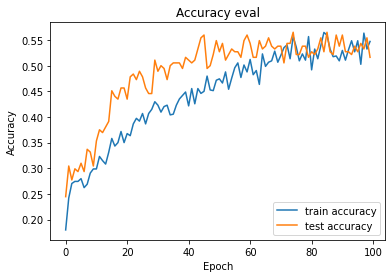

In [ ]:
# create accuracy sublpot
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="test accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy eval")  
plt.show()
# plt.savefig('esc-10-without_any_modif_in_data.png')

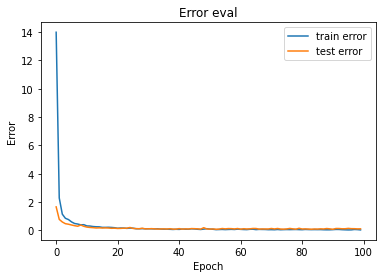

In [ ]:
# create error sublpot
plt.plot(history.history["loss"], label="train error")
plt.plot(history.history["val_loss"], label="test error")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.title("Error eval")
plt.show()
# plt.savefig('esc-10-without_any_modif_in_data_error.png')

In [19]:
import numpy as np
from sklearn.metrics import classification_report,f1_score, accuracy_score
Y_testi = np.argmax(y_test, axis=1) # Convert one-hot to index
y_predi = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(label_classes[Y_testi], label_classes[y_predi]))

NameError: ignored

# **Tensorflow evaluation**

In [ ]:
accuracies = []
micro=[]
macro=[]
weighted=[]
f1=np.ndarray((5,num_classes))
times = []
length=5

for model_nr in np.arange(5): 
  DATA_PATH=MODEL_PATH+'/model_{}/'.format(model_nr)

  model_new = keras.models.load_model(MODEL_PATH+'/model_{}/model.h5'.format(model_nr))

  X_test=np.load(DATA_PATH+'X_test.npy')
  y_test=np.load(DATA_PATH+'y_test.npy')
  X_train=np.load(DATA_PATH+'X_train.npy')
  y_train=np.load(DATA_PATH+'y_train.npy') 

  start=time.perf_counter()
  y_pred=np.zeros(len(X_test))
  y_pred = np.argmax(model_new.predict(X_test), axis=-1)
  stop=time.perf_counter()-start
  times.append(stop*1000)
  Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
  accuracies.append(accuracy_score(Y_test, y_pred))
  micro.append(f1_score(Y_test, y_pred, average='micro'))
  macro.append(f1_score(Y_test, y_pred, average='macro'))
  weighted.append(f1_score(Y_test, y_pred, average='weighted'))
  f1[model_nr]=(f1_score(Y_test, y_pred, average=None))

print("Accuracy mean, std")
print(np.mean(accuracies)*100)
print(np.std(accuracies)*100)
print("time mean, std (ms)")
print(np.mean(times))
print(np.std(times))
print("Micro f1 mean, std")
print(np.mean(micro))
print(np.std(micro))
print("Macro f1 mean, std")
print(np.mean(macro))
print(np.std(macro))
print("Weighted f1 mean, std")
print(np.mean(weighted))
print(np.std(weighted))
print("f1 multiclass mean, std")
print(f1.mean(axis=0))
print(f1.std(axis=0))

Accuracy mean, std
43.49999999999999
1.0606601717798223
time mean, std (ms)
130.9292190000633
6.825923913197913
Micro f1 mean, std
0.43499999999999994
0.010606601717798238
Macro f1 mean, std
0.43576001858508506
0.020631079846062727
Weighted f1 mean, std
0.43576001858508506
0.020631079846062727
f1 multiclass mean, std
[0.53573094 0.32166343 0.38308985 0.62879552 0.39905372 0.19666667
 0.51837928 0.40085307 0.52285714 0.67570028 0.66666667 0.55333333
 0.65787546 0.53887164 0.24074014 0.26080808 0.33747162 0.62005759
 0.65514042 0.44801465 0.50098039 0.66675106 0.26046003 0.32884449
 0.56481001 0.32687719 0.3572549  0.41754579 0.22554682 0.50034509
 0.37484737 0.31565611 0.2216571  0.51545408 0.31428571 0.53548674
 0.85893387 0.24761905 0.37404688 0.19333333 0.4398203  0.5047619
 0.44742424 0.13347093 0.3327725  0.55115865 0.42950383 0.61883754
 0.29631695 0.37142857]
[0.10943881 0.21070682 0.25838284 0.08040639 0.04730765 0.05617433
 0.10157782 0.08771977 0.17149701 0.03204223 0.22310934

In [ ]:
f1 = f1_score(Y_testi,y_predi,average=None)
f1_micro = f1_score(Y_testi,y_predi,average='micro')
f1_macro = f1_score(Y_testi,y_predi,average='macro')
f1_weighted = f1_score(Y_testi,y_predi,average='weighted')
print('micro',f1_micro,'macro',f1_macro,'weighted',f1_weighted)

micro 0.5163043478260869 macro 0.3930916683705855 weighted 0.4883503193245677


In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 28)           224       
_________________________________________________________________
maxpooling1d_1 (MaxPooling1D (None, 62, 28)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 57, 36)            6084      
_________________________________________________________________
maxpooling1d_2 (MaxPooling1D (None, 28, 36)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 26, 48)            5232      
_________________________________________________________________
flatten (Flatten)            (None, 1248)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)              

In [14]:
import tensorflow as tf


# **TFLite evaluation**

In [ ]:
accuracies = []
micro=[]
macro=[]
weighted=[]
f1=np.ndarray((5,num_classes))
times = []
length=5


for model_nr in np.arange(5):
  
  DATA_PATH=MODEL_PATH+'/model_{}/'.format(model_nr)
  TFLITE_PATH=MODEL_PATH+'/model_{}/model.tflite'.format(model_nr)
  print(TFLITE_PATH)
  
  model_new = keras.models.load_model(MODEL_PATH+'/model_{}/model.h5'.format(model_nr))
  converter = tf.lite.TFLiteConverter.from_keras_model(model_new)
  tflite_model = converter.convert()

  # Save the LITE model to file
  with open(TFLITE_PATH, "wb") as output_file:
      output_file.write(tflite_model)

  interpreter = interpreter = tf.lite.Interpreter(model_path=(TFLITE_PATH))
  interpreter.allocate_tensors()
  input_details = interpreter.get_input_details()

  output_details = interpreter.get_output_details()
  input_shape = input_details[0]['shape']

  
  X_test=np.load(DATA_PATH+'X_test.npy')
  y_test=np.load(DATA_PATH+'y_test.npy')
  X_train=np.load(DATA_PATH+'X_train.npy')
  y_train=np.load(DATA_PATH+'y_train.npy')
  y_pred=np.zeros(len(X_test))
  acc = 0

  for i in range(len(X_test)):
  # set_input(interpreter, X_test[i])
    input_data = np.array(X_test[i].reshape(input_shape), dtype=np.float32)
    #print(input_data.shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    start = time.perf_counter()
    interpreter.invoke()
    inference_time = time.perf_counter() - start
    times.append(inference_time * 1000)
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred[i]=np.argmax(output_data)
    if np.argmax(output_data) == np.argmax(y_test[i]):
      acc += 1
    
  Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
  micro.append(f1_score(Y_test, y_pred, average='micro'))
  macro.append(f1_score(Y_test, y_pred, average='macro'))
  weighted.append(f1_score(Y_test, y_pred, average='weighted'))
  f1[model_nr]=(f1_score(Y_test, y_pred, average=None))
  acc = (acc/len(X_test)) * 100
  accuracies.append(acc)
  
print("Accuracy mean, std")
print(np.mean(accuracies))
print(np.std(accuracies))
print("time mean, std (ms)")
print(np.mean(times))
print(np.std(times))
print("Micro f1 mean, std")
print(np.mean(micro))
print(np.std(micro))
print("Macro f1 mean, std")
print(np.mean(macro))
print(np.std(macro))
print("Weighted f1 mean, std")
print(np.mean(weighted))
print(np.std(weighted))
print("f1 multiclass mean, std")
print(f1.mean(axis=0))
print(f1.std(axis=0))

/content/drive/My Drive/Mim_model_1_hls4ml/ESC-50/model_0/model.tflite
INFO:tensorflow:Assets written to: /tmp/tmplcm2w9mu/assets


INFO:tensorflow:Assets written to: /tmp/tmplcm2w9mu/assets


/content/drive/My Drive/Mim_model_1_hls4ml/ESC-50/model_1/model.tflite
INFO:tensorflow:Assets written to: /tmp/tmpjmg621x_/assets


INFO:tensorflow:Assets written to: /tmp/tmpjmg621x_/assets


/content/drive/My Drive/Mim_model_1_hls4ml/ESC-50/model_2/model.tflite
INFO:tensorflow:Assets written to: /tmp/tmpdxlnapfl/assets


INFO:tensorflow:Assets written to: /tmp/tmpdxlnapfl/assets


/content/drive/My Drive/Mim_model_1_hls4ml/ESC-50/model_3/model.tflite
INFO:tensorflow:Assets written to: /tmp/tmp9gsi151n/assets


INFO:tensorflow:Assets written to: /tmp/tmp9gsi151n/assets


/content/drive/My Drive/Mim_model_1_hls4ml/ESC-50/model_4/model.tflite
INFO:tensorflow:Assets written to: /tmp/tmp_uatrxyo/assets


INFO:tensorflow:Assets written to: /tmp/tmp_uatrxyo/assets


Accuracy mean, std
43.5
1.0606601717798212
time mean, std (ms)
0.10012535500391095
0.025725967041527582
Micro f1 mean, std
0.43499999999999994
0.010606601717798238
Macro f1 mean, std
0.43576001858508506
0.020631079846062727
Weighted f1 mean, std
0.43576001858508506
0.020631079846062727
f1 multiclass mean, std
[0.53573094 0.32166343 0.38308985 0.62879552 0.39905372 0.19666667
 0.51837928 0.40085307 0.52285714 0.67570028 0.66666667 0.55333333
 0.65787546 0.53887164 0.24074014 0.26080808 0.33747162 0.62005759
 0.65514042 0.44801465 0.50098039 0.66675106 0.26046003 0.32884449
 0.56481001 0.32687719 0.3572549  0.41754579 0.22554682 0.50034509
 0.37484737 0.31565611 0.2216571  0.51545408 0.31428571 0.53548674
 0.85893387 0.24761905 0.37404688 0.19333333 0.4398203  0.5047619
 0.44742424 0.13347093 0.3327725  0.55115865 0.42950383 0.61883754
 0.29631695 0.37142857]
[0.10943881 0.21070682 0.25838284 0.08040639 0.04730765 0.05617433
 0.10157782 0.08771977 0.17149701 0.03204223 0.22310934 0.10241

In [42]:
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((X_train)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: protobuf, wheel, tensorflow-estimator, grpcio, absl-py, google-pasta, astunparse, gast, tensorboard, keras-preprocessing, typing-extensions, flatbuffers, six, termcolor, opt-einsum, h5py, wrapt, numpy
Required-by: fancyimpute


# **Quantized TFLite evaluation (post training quantization, 8bit)**

In [66]:
accuracies = []
micro=[]
macro=[]
weighted=[]
f1=np.ndarray((5,num_classes))
times = []
length=5

for model_nr in np.arange(5):  
  DATA_PATH=MODEL_PATH+'/model_{}/'.format(model_nr)
  TFLITE_PATH=MODEL_PATH+'/model_{}/model.tflite'.format(model_nr)
  QUANTIZED_TFLITE_PATH=MODEL_PATH+'/model_{}/quantmodel.tflite'.format(model_nr)

  X_test=np.load(DATA_PATH+'X_test.npy')
  y_test=np.load(DATA_PATH+'y_test.npy')
  X_train=np.load(DATA_PATH+'X_train.npy')
  y_train=np.load(DATA_PATH+'y_train.npy')

  model_new = keras.models.load_model(MODEL_PATH+'/model_{}/model.h5'.format(model_nr))
  converter = tf.lite.TFLiteConverter.from_keras_model(model_new)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  converter.representative_dataset = representative_dataset
  converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
  converter.target_spec.supported_types = [tf.int8]
  converter.experimental_new_converter=True

  

  y_pred=np.zeros(len(X_test)) 
  tflite_model = converter.convert()

  # Save the model to file
  with open(QUANTIZED_TFLITE_PATH, "wb") as output_file:
    output_file.write(tflite_model)
  
  acc = 0
  y_pred=np.zeros(len(X_test))

  interpreter = interpreter = tf.lite.Interpreter(model_path=(QUANTIZED_TFLITE_PATH))
  interpreter.allocate_tensors()
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  input_shape = input_details[0]['shape']
  for i in range(len(X_test)):
#       set_input(interpreter, x_test[i])
      input_data = X_test[i].reshape(input_shape).astype(np.float32)
      #input_data = input_data.astype(np.float32)
      interpreter.set_tensor(input_details[0]['index'], input_data)
      start = time.perf_counter()
      interpreter.invoke()
      inference_time = time.perf_counter() - start
      times.append(inference_time * 1000)
      output_data = interpreter.get_tensor(output_details[0]['index'])
      y_pred[i]=np.argmax(output_data)
      if np.argmax(output_data) == np.argmax(y_test[i]):
          acc += 1

  Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
  micro.append(f1_score(Y_test, y_pred, average='micro'))
  macro.append(f1_score(Y_test, y_pred, average='macro'))
  weighted.append(f1_score(Y_test, y_pred, average='weighted'))
  f1[model_nr]=(f1_score(Y_test, y_pred, average=None))
  acc = (acc/len(X_test)) * 100
  accuracies.append(acc)
  Y_test = np.argmax(y_test, axis=1)

print("Accuracy mean, std")
print(np.mean(accuracies))
print(np.std(accuracies))
print("time mean, std (ms)")
print(np.mean(times))
print(np.std(times))
print("Micro f1 mean, std")
print(np.mean(micro))
print(np.std(micro))
print("Macro f1 mean, std")
print(np.mean(macro))
print(np.std(macro))
print("Weighted f1 mean, std")
print(np.mean(weighted))
print(np.std(weighted))
print("f1 multiclass mean, std")
print(f1.mean(axis=0))
print(f1.std(axis=0))

INFO:tensorflow:Assets written to: /tmp/tmp5_kjzb3a/assets


INFO:tensorflow:Assets written to: /tmp/tmp5_kjzb3a/assets


INFO:tensorflow:Assets written to: /tmp/tmp6txsnxee/assets


INFO:tensorflow:Assets written to: /tmp/tmp6txsnxee/assets


INFO:tensorflow:Assets written to: /tmp/tmp0u3nfl64/assets


INFO:tensorflow:Assets written to: /tmp/tmp0u3nfl64/assets


INFO:tensorflow:Assets written to: /tmp/tmplmj145ow/assets


INFO:tensorflow:Assets written to: /tmp/tmplmj145ow/assets


INFO:tensorflow:Assets written to: /tmp/tmpsc2mt8nk/assets


INFO:tensorflow:Assets written to: /tmp/tmpsc2mt8nk/assets


Accuracy mean, std
24.1310223266745
5.795956008940409
time mean, std (ms)
1.76852572407039
0.20802975366866927
Micro f1 mean, std
0.241310223266745
0.057959560089404075
Macro f1 mean, std
0.1542815004746682
0.06665318544026302
Weighted f1 mean, std
0.20873828507745817
0.0701423438109633
f1 multiclass mean, std
[0.2430738  0.06424242 0.4355438  0.26825089 0.10427475 0.1179021
 0.         0.21241565 0.09711158 0.        ]
[0.0181498  0.08253112 0.08613409 0.17506971 0.09791405 0.11681428
 0.         0.14841271 0.11255857 0.        ]


# **Quantization aware training**

In [17]:
! pip install -q tensorflow-model-optimization

     |████████████████████████████████| 174kB 6.6MB/s 


In [18]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_model_optimization as tfmot

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
#X[:] = (df.iloc[:,:193])
# = MinMaxScaler((-127, 127)).fit_transform(a)
X[:] = StandardScaler().fit_transform(df.iloc[:,:193])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3051: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(key, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3036: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
cvscores = []
Prediction_time_liste = []
fold = 0
model_nr=0
for train, test in kf.split(X,y):#scaler = X
    fold+=1
    print(f"Fold #{fold}")
        
#    X_train = X.to_numpy()[train]
    X_train =  X.to_numpy()[train]
    y_train = y.to_numpy()[train]
    X_test =  X.to_numpy()[test]
    y_test = y.to_numpy()[test]

    # Architecture
    model = keras.Sequential()

    # 1st conv layer

    model.add(Conv2D(28, (7, 1), name='conv2d_1', activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),input_shape = (193, 1, 1)))
    model.add(MaxPooling2D((3, 1), name='maxpooling2d_1'))
    # 2nd conv layer

    model.add(Conv2D(36, (6,1), name='conv2d_2', activation='relu',padding='valid', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 1), name='maxpooling2d_2'))
    # 3nd conv layer
    # model.add(Dropout(0.5))

    model.add(Conv2D(48, (3, 1), name='conv2d_3', activation='relu',padding='valid'))
    model.add(Flatten(name='flatten'))


    # 4nd conv layer

    model.add(Dense(20, name='dense_1', activation='relu'))
    model.add(Dropout(0.5, name='dropout'))

    model.add(Dense(num_classes, name='dense_2', activation='softmax'))

    #Quantization aware training
    quantize_model = tfmot.quantization.keras.quantize_model

    # q_aware stands for for quantization aware.
    model = quantize_model(model)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
    y_train = keras.utils.to_categorical(y_train - 1, num_classes=num_classes) # Converts a class vector (integers) to binary class matrix
    y_test = keras.utils.to_categorical(y_test - 1, num_classes=num_classes)
  
    X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
    X_test = np.expand_dims(X_test, axis=2)
    X_train = np.expand_dims(X_train, axis=3) # Make 2-dim into 3-dim array to fit model
    X_test = np.expand_dims(X_test, axis=3)
    print(X_train.shape)
    model.summary()
#     monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
    history = model.fit(X_train, y_train,epochs=100, verbose=2,validation_data=(X_test, y_test))  

    
    if not os.path.exists(MODEL_PATH+'/qawmodel_{}'.format(model_nr)):
      os.makedirs(MODEL_PATH+'/qawmodel_{}'.format(model_nr))
    model.save(MODEL_PATH+'/qawmodel_{}/qawmodel.h5'.format(model_nr)) 
    np.save(MODEL_PATH+'/qawmodel_{}/X_train.npy'.format(model_nr),X_train)
    np.save(MODEL_PATH+'/qawmodel_{}/y_train.npy'.format(model_nr),y_train)
    np.save(MODEL_PATH+'/qawmodel_{}/X_test.npy'.format(model_nr),X_test)
    np.save(MODEL_PATH+'/qawmodel_{}/y_test.npy'.format(model_nr),y_test)

    model_nr+=1

#   monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
    start_pr = time.clock()
    scores = model.evaluate(X_test, y_test, verbose=0) # Computes the loss & accuracy based on the input you pass it
    end_pr = time.clock()
    Prediction_time = (end_pr - start_pr)*1000
    Prediction_time = Prediction_time/len(X_test)
    print(f"Prediction time: {Prediction_time_liste.append(Prediction_time)}ms")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("value of Prediction total:{}, value of std_Prediction:{}".format(np.mean(Prediction_time_liste), np.std(Prediction_time_liste)))
    


Fold #1
(739, 193, 1, 1)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_22 (QuantizeL (None, 193, 1, 1)         3         
_________________________________________________________________
quant_conv2d_1 (QuantizeWrap (None, 187, 1, 28)        283       
_________________________________________________________________
quant_maxpooling2d_1 (Quanti (None, 62, 1, 28)         1         
_________________________________________________________________
quant_conv2d_2 (QuantizeWrap (None, 57, 1, 36)         6159      
_________________________________________________________________
quant_maxpooling2d_2 (Quanti (None, 28, 1, 36)         1         
_________________________________________________________________
quant_conv2d_3 (QuantizeWrap (None, 26, 1, 48)         5331      
_________________________________________________________________
quant_flatten (QuantizeWrapp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Prediction time: Nonems
accuracy: 60.54%
Fold #2
(739, 193, 1, 1)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_23 (QuantizeL (None, 193, 1, 1)         3         
_________________________________________________________________
quant_conv2d_1 (QuantizeWrap (None, 187, 1, 28)        283       
_________________________________________________________________
quant_maxpooling2d_1 (Quanti (None, 62, 1, 28)         1         
_________________________________________________________________
quant_conv2d_2 (QuantizeWrap (None, 57, 1, 36)         6159      
_________________________________________________________________
quant_maxpooling2d_2 (Quanti (None, 28, 1, 36)         1         
_________________________________________________________________
quant_conv2d_3 (QuantizeWrap (None, 26, 1, 48)         5331      
_____________________________________________________

In [ ]:
accuracies = []
micro=[]
macro=[]
weighted=[]
f1=np.ndarray((5,num_classes))
times = []
length=5

for model_nr in np.arange(5): 
  QAW_MODEL_PATH=MODEL_PATH+'/qawmodel_{}/qawmodel.h5'.format(model_nr)
  DATA_PATH=MODEL_PATH+'/qawmodel_{}/'.format(model_nr)

  with tfmot.quantization.keras.quantize_scope():
      model_new = tf.keras.models.load_model(QAW_MODEL_PATH)

  X_test=np.load(DATA_PATH+'X_test.npy')
  y_test=np.load(DATA_PATH+'y_test.npy')
  X_train=np.load(DATA_PATH+'X_train.npy')
  y_train=np.load(DATA_PATH+'y_train.npy') 

  y_pred=np.zeros(len(X_test))

  start=time.perf_counter()
  y_pred = np.argmax(model_new.predict(X_test), axis=-1)
  stop=time.perf_counter()-start
  times.append(stop*1000)
  Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
  accuracies.append(accuracy_score(Y_test, y_pred))
  micro.append(f1_score(Y_test, y_pred, average='micro'))
  macro.append(f1_score(Y_test, y_pred, average='macro'))
  weighted.append(f1_score(Y_test, y_pred, average='weighted'))
  f1[model_nr]=(f1_score(Y_test, y_pred, average=None))

print("Accuracy mean, std")
print(np.mean(accuracies)*100)
print(np.std(accuracies)*100)
print("time mean, std (ms)")
print(np.mean(times))
print(np.std(times))
print("Micro f1 mean, std")
print(np.mean(micro))
print(np.std(micro))
print("Macro f1 mean, std")
print(np.mean(macro))
print(np.std(macro))
print("Weighted f1 mean, std")
print(np.mean(weighted))
print(np.std(weighted))
print("f1 multiclass mean, std")
print(f1.mean(axis=0))
print(f1.std(axis=0))

Accuracy mean, std
76.25
2.8504385627478435
time mean, std (ms)
171.10618839997187
9.525247053504
Micro f1 mean, std
0.7625
0.028504385627478434
Macro f1 mean, std
0.7604196199397438
0.03060496880795842
Weighted f1 mean, std
0.7604196199397438
0.03060496880795842
f1 multiclass mean, std
[0.82551282 0.75460612 0.72207283 0.7010955  0.75704482 0.67619048
 0.73472851 0.7445098  0.88603641 0.80239891]
[0.06869498 0.11026397 0.05324145 0.13234514 0.20016609 0.1914262
 0.06660581 0.05242156 0.04503596 0.09207136]


In [40]:
for model_nr in np.arange(5):  
  QAW_MODEL_PATH=MODEL_PATH+'/qawmodel_{}/qawmodel.h5'.format(model_nr)
  DATA_PATH=MODEL_PATH+'/qawmodel_{}/'.format(model_nr)
  QAW_TFLITE_PATH=MODEL_PATH+'/qawmodel_{}/qawmodel.tflite'.format(model_nr)
  QAW_QUANTIZED_TFLITE_PATH=MODEL_PATH+'/qawmodel_{}/quant_qawmodel.tflite'.format(model_nr)
  with tfmot.quantization.keras.quantize_scope():
      model = tf.keras.models.load_model(QAW_MODEL_PATH)
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  tflite_model = converter.convert()
  # Save the LITE model to file
  with open(QAW_TFLITE_PATH, "wb") as output_file:
      output_file.write(tflite_model)
  # load the previously saved model
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  #converter.representative_dataset = get_representative_dataset_gen(x_train)
  #converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
  #converter.target_spec.supported_types = [tf.int8]
  #converter.inference_input_type = tf.int8
  #converter.inference_output_type = tf.int8
  tflite_model = converter.convert()
  # Save the quantized lite model to file
  with open(QAW_QUANTIZED_TFLITE_PATH, "wb") as output_file:
      output_file.write(tflite_model) 

INFO:tensorflow:Assets written to: /tmp/tmprwk4u2w0/assets


INFO:tensorflow:Assets written to: /tmp/tmprwk4u2w0/assets


INFO:tensorflow:Assets written to: /tmp/tmpqdusroq0/assets


INFO:tensorflow:Assets written to: /tmp/tmpqdusroq0/assets


INFO:tensorflow:Assets written to: /tmp/tmpb2ybsgqd/assets


INFO:tensorflow:Assets written to: /tmp/tmpb2ybsgqd/assets


INFO:tensorflow:Assets written to: /tmp/tmp_jsambxq/assets


INFO:tensorflow:Assets written to: /tmp/tmp_jsambxq/assets


INFO:tensorflow:Assets written to: /tmp/tmp8zyqgkay/assets


INFO:tensorflow:Assets written to: /tmp/tmp8zyqgkay/assets


INFO:tensorflow:Assets written to: /tmp/tmpwqwsgkfn/assets


INFO:tensorflow:Assets written to: /tmp/tmpwqwsgkfn/assets


INFO:tensorflow:Assets written to: /tmp/tmp5ko4m2nv/assets


INFO:tensorflow:Assets written to: /tmp/tmp5ko4m2nv/assets


INFO:tensorflow:Assets written to: /tmp/tmpfxeocila/assets


INFO:tensorflow:Assets written to: /tmp/tmpfxeocila/assets


INFO:tensorflow:Assets written to: /tmp/tmpd2v_100_/assets


INFO:tensorflow:Assets written to: /tmp/tmpd2v_100_/assets


INFO:tensorflow:Assets written to: /tmp/tmp25b07z4t/assets


INFO:tensorflow:Assets written to: /tmp/tmp25b07z4t/assets


# **Quantized TFLite evaluation (quantization aware trained)**

In [55]:
accuracies = []
micro=[]
macro=[]
weighted=[]
f1=np.ndarray((5,num_classes))
times = []
length=5

for model_nr in np.arange(5):  
  QAW_QUANTIZED_TFLITE_PATH=MODEL_PATH+'/qawmodel_{}/quant_qawmodel.tflite'.format(model_nr)
  DATA_PATH=MODEL_PATH+'/qawmodel_{}/'.format(model_nr)
  interpreter = interpreter = tf.lite.Interpreter(model_path=(QAW_QUANTIZED_TFLITE_PATH))
  interpreter.allocate_tensors()
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  input_shape = input_details[0]['shape']

  X_test=np.load(DATA_PATH+'X_test.npy')
  y_test=np.load(DATA_PATH+'y_test.npy')
  X_train=np.load(DATA_PATH+'X_train.npy')
  y_train=np.load(DATA_PATH+'y_train.npy')  

  y_pred=np.zeros(len(X_test))
  acc=0
  for i in range(len(X_test)):
    input_data = X_test[i].reshape(input_shape).astype(np.float32)
    #input_data = input_data.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    start = time.perf_counter()
    interpreter.invoke()
    inference_time = time.perf_counter() - start
    times.append(inference_time * 1000)
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred[i]=np.argmax(output_data)
    if np.argmax(output_data) == np.argmax(y_test[i]):
        acc += 1

  acc = (acc/len(X_test)) * 100
  Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
  accuracies.append(accuracy_score(Y_test, y_pred))
  micro.append(f1_score(Y_test, y_pred, average='micro'))
  macro.append(f1_score(Y_test, y_pred, average='macro'))
  weighted.append(f1_score(Y_test, y_pred, average='weighted'))
  f1[model_nr]=(f1_score(Y_test, y_pred, average=None))

print("Accuracy mean, std")
print(np.mean(accuracies)*100)
print(np.std(accuracies)*100)
print("time mean, std (ms)")
print(np.mean(times))
print(np.std(times))
print("Micro f1 mean, std")
print(np.mean(micro))
print(np.std(micro))
print("Macro f1 mean, std")
print(np.mean(macro))
print(np.std(macro))
print("Weighted f1 mean, std")
print(np.mean(weighted))
print(np.std(weighted))
print("f1 multiclass mean, std")
print(f1.mean(axis=0))
print(f1.std(axis=0))

Accuracy mean, std
40.15
2.083266665599965
time mean, std (ms)
1.7631754584917871
0.18558389685654675
Micro f1 mean, std
0.40149999999999997
0.02083266665599965
Macro f1 mean, std
0.39353763228112126
0.021402045436901468
Weighted f1 mean, std
0.39353763228112126
0.021402045436901468
f1 multiclass mean, std
[0.52780821 0.37513495 0.47448773 0.62836996 0.3752381  0.33294627
 0.5370915  0.57619048 0.53551948 0.54912734 0.67955182 0.45560234
 0.47831933 0.37892832 0.18894686 0.2531746  0.16430642 0.62166667
 0.38011204 0.44427457 0.42698972 0.62994865 0.28770351 0.14229692
 0.522493   0.28945055 0.34794486 0.26214178 0.15386852 0.39095747
 0.20415966 0.15944056 0.08210526 0.40260909 0.2812605  0.62166667
 0.69735569 0.06153846 0.38598291 0.36834499 0.45676676 0.51134366
 0.55843137 0.24969697 0.33739538 0.5645098  0.15833333 0.58807692
 0.26881462 0.30845704]
[0.11403721 0.13149485 0.13928402 0.10137544 0.11185511 0.129542
 0.09736094 0.09452111 0.19869744 0.05476986 0.05772211 0.15655156
